In [1]:
#Time Series Forecasting
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
f_birth = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Python/projects/Datasets/Time Series/daily-total-female-births-in-cal.csv", index_col= [0], parse_dates= [0])
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [39]:
newBirth_df = pd.concat([f_birth, f_birth.shift(1)], axis= 1)
newBirth_df.columns = ("Actual Birth", "Forecast Birth")
newBirth_df.head()

,Actual Birth,Forecast Birth
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [13]:
type(f_birth)

pandas.core.frame.DataFrame

In [19]:
series_value = f_birth.values

In [20]:
type(series_value)

numpy.ndarray

In [21]:
f_birth.size

366

In [22]:
f_birth.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [24]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [27]:
# remove last entry of the dataframe which is very odd as compared to the rest of the data
f_birth = f_birth[0:365]

In [26]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

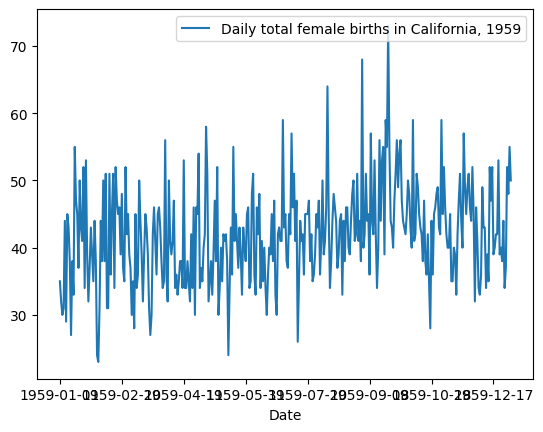

In [28]:
f_birth.plot()

In [29]:
#Moving 20 day average
f_birth_mean = f_birth.rolling(window= 20).mean()

<Axes: xlabel='Date'>

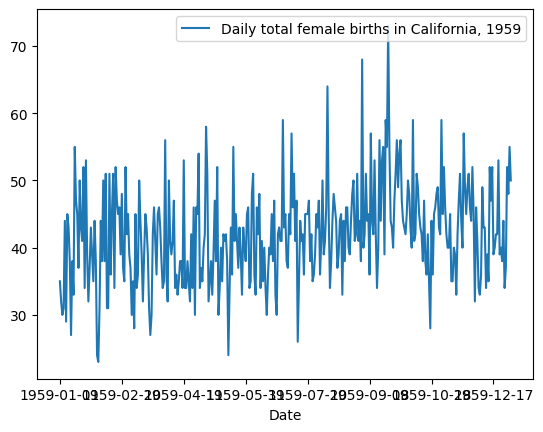

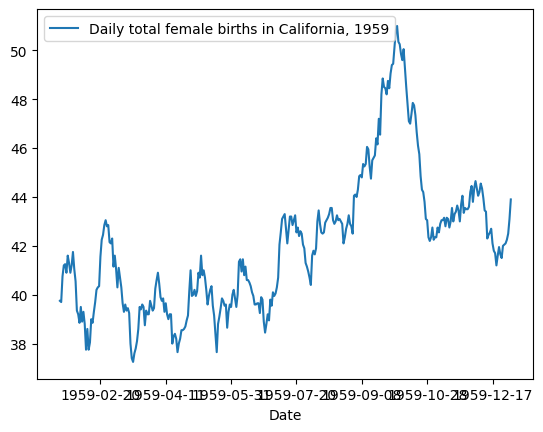

In [30]:
f_birth.plot()
f_birth_mean.plot()

In [31]:
#convert the series into a dataframe
value = pd.DataFrame(series_value)

In [33]:
#concatenate 
birth_df = pd.concat([value, value.shift(1)], axis= 1)

In [34]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [42]:
# Rename the column
birth_df.columns = ["Actual_Birth", "Forecast_Birth"]
birth_df.head()

,Actual_Birth,Forecast_Birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [58]:
#removing the first entry which is NaN and the last entry which is 1959
birth_test = birth_df[1:365]
birth_test.tail()

,Actual_Birth,Forecast_Birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [59]:
birth_error = mean_squared_error(birth_test.Actual_Birth, birth_test.Forecast_Birth)

In [60]:
birth_error

84.22252747252747

In [61]:
np.sqrt(birth_error)

9.177283229394606

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

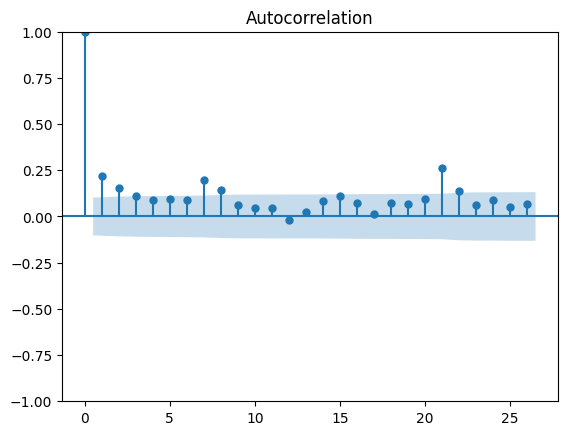

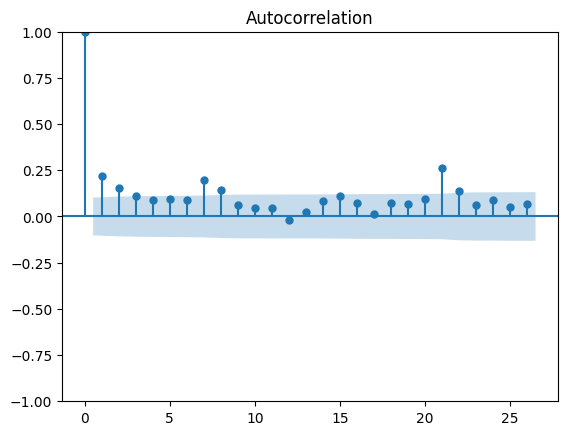

In [64]:
# plot acf is to identify parameter Q
# ARIMA (p,d,q)

plot_acf(f_birth)

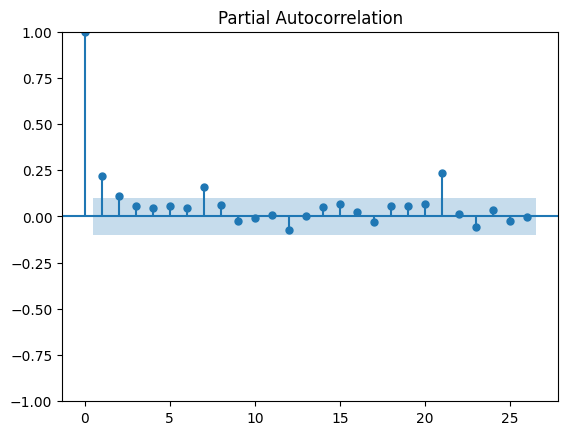

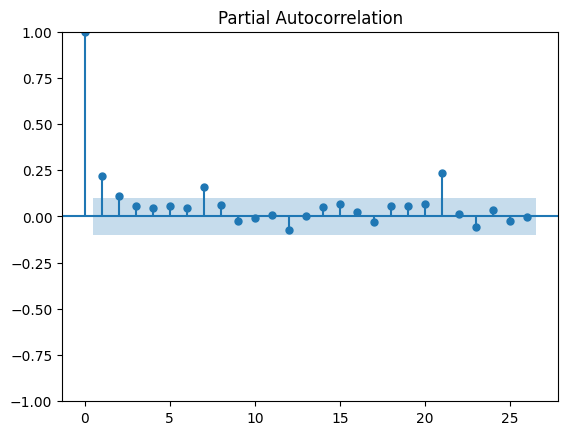

In [66]:
# plot pacf is to identify parameter p
plot_pacf(f_birth)

In [67]:
# p=2,3     d=0     q=3,4
f_birth.size

365

In [68]:
birth_train = f_birth[:330]
birth_test = f_birth[330:365]

In [69]:
birth_train.size

330

In [70]:
birth_test.size

35

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
birth_model = ARIMA(birth_train, order = (2, 1, 3))
birth_model_fit = birth_model.fit()

c:\Users\prade\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\prade\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\prade\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\prade\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
birth_model_fit.aic

2229.852146313237

In [92]:
birth_forecast = birth_model_fit.forecast(steps=35)

In [93]:
birth_forecast

1959-11-27    45.021317
1959-11-28    44.991664
1959-11-29    44.578644
1959-11-30    44.736810
1959-12-01    44.450988
1959-12-02    44.655288
1959-12-03    44.417555
1959-12-04    44.626094
1959-12-05    44.412102
1959-12-06    44.612895
1959-12-07    44.414765
1959-12-08    44.604768
1959-12-09    44.419601
1959-12-10    44.598418
1959-12-11    44.424841
1959-12-12    44.592841
1959-12-13    44.429971
1959-12-14    44.587720
1959-12-15    44.434850
1959-12-16    44.582949
1959-12-17    44.439449
1959-12-18    44.578479
1959-12-19    44.443771
1959-12-20    44.574287
1959-12-21    44.447831
1959-12-22    44.570352
1959-12-23    44.451643
1959-12-24    44.566659
1959-12-25    44.455221
1959-12-26    44.563192
1959-12-27    44.458580
1959-12-28    44.559937
1959-12-29    44.461733
1959-12-30    44.556882
1959-12-31    44.464694
Freq: D, Name: predicted_mean, dtype: float64

In [87]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [94]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.664599101765638